## Пример решения задачи регрессии

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

In [2]:
# получим столбец чисел, равномерно распределенных на интервале [0, 1) и упорядоченных по возрастанию
X = np.sort( 5 * np.random.rand(40, 1), axis = 0 )

In [3]:
X[:5]

array([[0.04375535],
       [0.21837477],
       [0.43727493],
       [0.4792861 ],
       [0.54031807]])

In [4]:
# зададим какую-нибудь функцию
# функция ravel() применена, чтобы преобразовать вложенный лист np.sin( X ) в простой массив
y = np.sin( X ).ravel()
y

array([ 0.04374139,  0.21664328,  0.42347237,  0.46114583,  0.51440878,
        0.63786372,  0.73305547,  0.78838892,  0.83991434,  0.84230841,
        0.87704824,  0.90389761,  0.92807954,  0.99315775,  0.87835104,
        0.65763193,  0.64016587,  0.54503256,  0.49301194,  0.49001368,
        0.40591014,  0.32610303,  0.12471352, -0.18827987, -0.19169635,
       -0.20197775, -0.21072055, -0.24734985, -0.26896286, -0.27995672,
       -0.49238053, -0.65083905, -0.77019456, -0.82033087, -0.90568242,
       -0.94751007, -0.97305797, -0.999936  , -0.99577238, -0.98093078])

In [5]:
np.sin( X )[:5]

array([[0.04374139],
       [0.21664328],
       [0.42347237],
       [0.46114583],
       [0.51440878]])

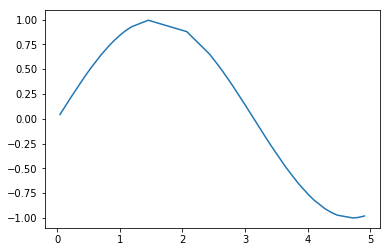

In [6]:
plt.plot( X, y )
plt.show()

In [7]:
# добавим шум к зависимой переменной
# к каждому пятому элементу добавляем случайное число
y[::5] += 1 * ( 0.5 - np.random.rand( 8 ) )

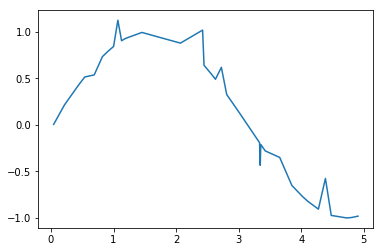

In [8]:
plt.plot( X, y )
plt.show()

In [9]:
# определим набор значений, на которых надо будет делать предсказания
T = np.linspace( 0, 5, 500 )[:, np.newaxis] # 500 точек в интервале от 0 до 5

In [10]:
T[:5]

array([[0.        ],
       [0.01002004],
       [0.02004008],
       [0.03006012],
       [0.04008016]])

In [11]:
# задаем количество соседей, которое будем учитывать в KNN
n_neighbors = 5

In [12]:
knn = neighbors.KNeighborsRegressor( n_neighbors, weights = 'uniform' )
y_ = knn.fit( X, y ).predict( T )

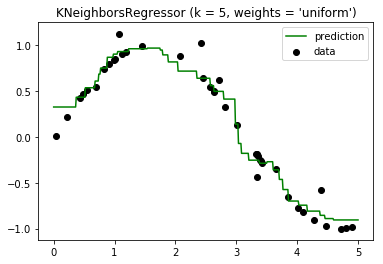

In [13]:
plt.scatter(X, y, c='k', label='data')
plt.plot(T, y_, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, 'uniform'))
plt.show()

Для варианта с весами видно сильное влияние расстояния

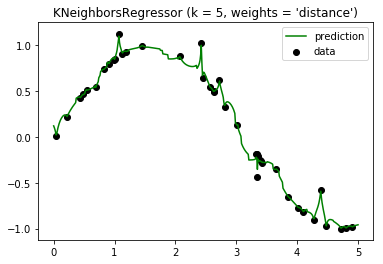

In [14]:
knn = neighbors.KNeighborsRegressor( n_neighbors, weights = 'distance' )
y_ = knn.fit( X, y ).predict( T )

plt.scatter(X, y, c='k', label='data')
plt.plot(T, y_, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, 'distance'))
plt.show()